<a href="https://colab.research.google.com/github/navtej16/Emotion_Recgonition_using_audio_and_video/blob/main/Emotion_recognition_using_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , AveragePooling2D
from keras.layers import Dense , Activation , Dropout ,Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator



In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/fer2013.csv')

Mounted at /content/gdrive


In [4]:
#data.shape
#data.head()

x_test = []
y_test = []
x_train = []
y_train = []

import numpy as np

l = np.array(data);

for index,row in data.iterrows():
  k = row['pixels'].split(" ")

  emot = row['emotion']
  emot = keras.utils.to_categorical(emot,7)

  if row['Usage'] == 'Training' :
    x_train.append(np.array(k))
    y_train.append(emot)
  elif row['Usage'] == 'PublicTest' :
    x_test.append(np.array(k))
    y_test.append(emot)
  
x_train = np.array(x_train,'float32')
y_train = np.array(y_train,'float32')
x_test = np.array(x_test,'float32')
y_test = np.array(y_test,'float32')

#print(x_train.shape)
#print(y_train)
#print(x_test)

x_train /=255
x_test /=255

x_train = x_train.reshape(x_train.shape[0],48,48,1)
x_test = x_test.reshape(x_test.shape[0],48,48,1)
#print(x_train.shape)






In [5]:
model = Sequential()

#1st 1ayer
model.add(Conv2D(64,(5,5),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

#2nd 1ayer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

#3rd 1ayer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

gen = ImageDataGenerator()
train_gen = gen.flow(x_train,y_train,batch_size=256)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fit = True 

if fit == True:
   model.fit_generator(train_gen,steps_per_epoch = 32 , epochs = 30)
else:
  model.load_weights('/data/facial_expression_model_weights.h5')








/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
32/32 [==============================] - 56s 2s/step - loss: 1.8591 - accuracy: 0.2045
Epoch 2/30
32/32 [==============================] - 55s 2s/step - loss: 1.8148 - accuracy: 0.2473
Epoch 3/30
32/32 [==============================] - 53s 2s/step - loss: 1.8114 - accuracy: 0.2524
Epoch 4/30
32/32 [==============================] - 54s 2s/step - loss: 1.8121 - accuracy: 0.2480
Epoch 5/30
32/32 [==============================] - 54s 2s/step - loss: 1.8191 - accuracy: 0.2473
Epoch 6/30
32/32 [==============================] - 53s 2s/step - loss: 1.8129 - accuracy: 0.2503
Epoch 7/30
32/32 [==============================] - 53s 2s/step - loss: 1.8065 - accuracy: 0.2469
Epoch 8/30
32/32 [==============================] - 58s 2s/step - loss: 1.7512 - accuracy: 0.2782
Epoch 9/30
32/32 [==============================] - 54s 2s/step - loss: 1.6788 - accuracy: 0.3155
Epoch 10/30
32/32 [==============================] - 55s 2s/step - loss: 1.6705 - accuracy: 0.3243
Epoch 11/30
32/32 [

In [16]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


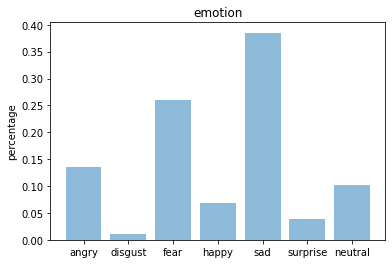

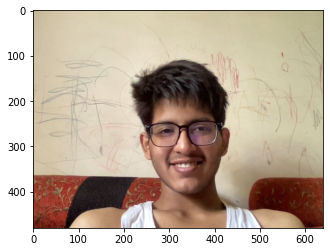

In [21]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [18]:

import cv2
            
def facecrop(image):  
    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


if __name__ == '__main__':
    facecrop('1.jpg')

'NoneType' object has no attribute 'shape'


In [19]:

#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [20]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

In [15]:
import cv2
face_cascade = cv2.CascadeClassifier("/haarcascade_frontalface_default.xml")

cam = cv2.VideoCapture(0)

while True:
  check,frame = cam.read()
  frame = cv2.imread('/content/close-up-happy-face-boy_1150-12122.jpeg')
  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    #roi_color = img[y:y+h, x:x+w]
    #eyes = eye_cascade.detectMultiScale(roi_gray)
    #for (ex,ey,ew,eh) in eyes:
       # cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    roi_gray=cv2.resize(roi_gray,(48,48))
    img_pix = frame.image_to_array(roi.gray)
    img_pix = np.expand_dims(img_pix,axis=0)
    img_pix /= 255


      
    pred = model.predict(img_pix)
    max_index = np.argmax(pred[0])
      
    emotion_detect = ('angry','disgust','fear','happy','sad','surprise','neutral')
    emo_predictions = emotion_detect[max_index]
    print(emo_predictions)
    #image = cv2.putText(frame,emo_predictions,(50,50),cv2.FONT_HERSHEY_SIMPLE,2)

resized_img = cv2.resize(image,(1000,700))
cv2.imshow('img',resized_img)
cv2.waitKey(1)
if key == 27:
  break

cam.release()
cv2.destroyAllWindows()


KeyboardInterrupt: ignored